In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 해당 링크 참조 : https://wikidocs.net/52460

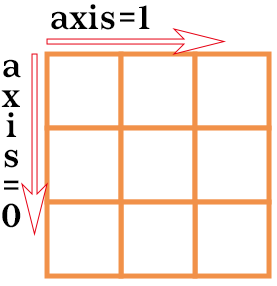



---



In [24]:
import numpy as np
import torch

# Numpy

1D Array

In [25]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [26]:
print('Rank of t: ', t.ndim) #ndim : 차원 확인
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


In [33]:
print('t[0] t[1] t[-1] = ', t[0], t[1],t[-1]) # 값 가져오기
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1])   # indexing
print('t[:2] t[3:]     = ', t[:2], t[3:])      # indexing

t[0] t[1] t[-1] =  tensor(0.) tensor(1.) tensor(6.)
t[2:5] t[4:-1]  =  tensor([2., 3., 4.]) tensor([4., 5.])
t[:2] t[3:]     =  tensor([0., 1.]) tensor([3., 4., 5., 6.])


2D Array

In [29]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [30]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  2
Shape of t:  (4, 3)


# PyTorch

1D Array

In [31]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [34]:
print(t.dim())  # rank -> numpy의 ndim과 같은 역할
print(t.shape)  # shape
print(t.size()) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1]) # Indexing
print(t[:2], t[3:]) # Indexing

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


2D Array

In [35]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [36]:
print(t.dim())  # rank
print(t.size()) # shape
print(t[:, 1])
print(t[:, 1].size())
print(t[:, :-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## Shape, Rank, Axis

In [37]:
t = torch.FloatTensor([[[[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12]],
                       [[13, 14, 15, 16],
                        [17, 18, 19, 20],
                        [21, 22, 23, 24]]
                       ]])

In [41]:
print(t.dim())
print(t.size())
print(t.shape)

4
torch.Size([1, 2, 3, 4])
torch.Size([1, 2, 3, 4])


## 연산

In [42]:
# Mul과 Matmul

print()
print('-------------')
print('Mul vs Matmul')
print('-------------')
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))


-------------
Mul vs Matmul
-------------
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [46]:
# Broadcasting

# Same shape
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)
print("---------")

# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # 3 -> [[3, 3]]
print(m1 + m2)
print("---------")

# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])

"""
m1 ->
[[1, 2]
,[1, 2]]
m2 ->
[[3, 3]
,[4, 4]]
"""

print(m1 + m2)

tensor([[5., 5.]])
---------
tensor([[4., 5.]])
---------
tensor([[4., 5.],
        [5., 6.]])


In [51]:
# Mean
t = torch.FloatTensor([1, 2])
print(t.mean())
print("---------")

# Can't use mean() on integers
t = torch.LongTensor([1, 2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)
print("---------")
t = torch.FloatTensor([1, 2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)
print("---------")

#mean을 아래ㅗ아 같은 방식으로도 사용가능
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print("---------")
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1)) #dim=-1를 주는 경우를 보겠습니다. 이는 마지막 차원을 제거한다는 의미이고, 결국 열의 차원을 제거한다는 의미와 같습니다.

tensor(1.5000)
---------
Can only calculate the mean of floating types. Got Long instead.
---------
tensor(1.5000)
---------
tensor([[1., 2.],
        [3., 4.]])
---------
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [53]:
# Sum
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print("---------")
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
---------
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [55]:
# Max / Argmax
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print("---------")

print(t.max()) # Returns one value: max
print("---------")

print(t.max(dim=0)) # Returns two values: max and argmax
print("---------")
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])
print("---------")

print(t.max(dim=1))
print(t.max(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
---------
tensor(4.)
---------
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
---------
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])
---------
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


In [57]:
# View
# 유용함

t = np.array([[[0, 1, 2],
               [3, 4, 5]],

              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)
print("---------")

print(ft.view([-1, 3])) # -1로 되어있으니, row는 모르겠고 colunm을 3으로 맞춘다는 것
print(ft.view([-1, 3]).shape)
print("---------")

print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

torch.Size([2, 2, 3])
---------
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])
---------
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [59]:
# Squeeze : 차원 값이 1인 걸 지움
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)
print("---------")

print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
---------
tensor([0., 1., 2.])
torch.Size([3])


In [61]:
# Unsqueeze : 0 차원 값을 추가인 걸 지움
ft = torch.Tensor([0, 1, 2])
print(ft)
print(ft.shape)
print("---------")

print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)
print("---------")

print(ft.view(1, -1))
print(ft.view(1, -1).shape)
print("---------")

print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)
print("---------")

print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([0., 1., 2.])
torch.Size([3])
---------
tensor([[0., 1., 2.]])
torch.Size([1, 3])
---------
tensor([[0., 1., 2.]])
torch.Size([1, 3])
---------
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
---------
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [67]:
# Scatter (for one-hot encoding)
lt = torch.LongTensor([[0], [1], [2], [0]])
print(lt)
print("---------")

# scatter(dim,index,src) -> dim은 차원 축 / index는 위치 / src나 value는 scatter할 값
one_hot = torch.zeros(4, 3) # batch_size = 4, classes = 3
one_hot.scatter_(0, lt, 1)
print(one_hot)

one_hot = torch.zeros(4, 3) # batch_size = 4, classes = 3
one_hot.scatter_(1, lt, 1)
print(one_hot)

tensor([[0],
        [1],
        [2],
        [0]])
---------
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])


In [69]:
# Casting
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)
print("---------")

print(lt.float())
print("---------")

bt = torch.ByteTensor([True, False, False, True])
print(bt)
print("---------")

print(bt.long())
print(bt.float())

tensor([1, 2, 3, 4])
---------
tensor([1., 2., 3., 4.])
---------
tensor([1, 0, 0, 1], dtype=torch.uint8)
---------
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


In [71]:
# Concatenation
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(x)
print(y)
print("---------")
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])
---------
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [73]:
# Stacking
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x)
print(y)
print(z)
print("---------")
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

print("---------")
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
---------
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
---------
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [74]:
# Ones and Zeros Like
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [75]:
# In-place Operation

x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [77]:
# 기타 정보 Zip
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)
print("---------")
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4
2 5
3 6
---------
1 4 7
2 5 8
3 6 9
